# The Titanic Dataset

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict the survival of the titanic ship passengers based the information about the passengers.

### b) Defining the Metric for Success

> For this analysis to be considered successful, the following areas are to be covered:

1. If we create models that determines whether or not the passengers surved
2. Apply the KNN algorithm to classify the survival.

### c) Understanding the context 

> RMS Titanic
The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. Titanic has inspired countless books, articles and films (including the 1997 “Titanic” movie starring Kate Winslet and Leonardo DiCaprio), and the ships story has entered the public consciousness as a cautionary tale about the perils of human hubris.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1.Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording our observations.
6. Performing classification using any of the KNN algorithm.
7. Challenge our solution

### e) Data Relevance

> The dataset to use for this project is found by following this link: [https://archive.org/download/train5_202002/train%20%285%29.csv] for train dataset and [https://archive.org/download/test1_202002/test%20%281%29.csv] for the test dataset.

> The dataset has the following columns/features;

PassengerId	
Survived	
Pclass	
Name	
Sex	
Age	
SibSp	
Parch	
Ticket	
Fare	
Cabin	
Embarked

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
import pandas as pd
import numpy as np

train_df = pd.read_csv('train (5).csv')
test_df = pd.read_csv('test (1).csv')



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
train_df.shape

(891, 12)

In [ ]:
# Determining the no. of records in our dataset
#
test_df.shape

(418, 11)

In [ ]:
# Previewing the top of our dataset
#
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# dropping the irrelevant columns
train_df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


> After droping the irrelevant columns we remain with 8 columns.

In [ ]:
# Finding the unique
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

> The Embarked column has 3 unique identifiers.

In [ ]:
# changing our data types from object and replacing with binary number

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_df['Embarked'] = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})
train_df['Sex'] = train_df['Sex'].replace({'male':0, 'female':1})

> We encode our Embarked and Sex unique identifiers to binary.

In [ ]:
# Checking whether each column has an appropriate datatype
#
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


> Our features have 5 integers and 3 floats.

In [ ]:
# checking columns
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

> we did not have external dataset for using in our data validation therefore we chose to work with the data provided and try to find the insights from the dataset.

## 5. Tidying the Dataset

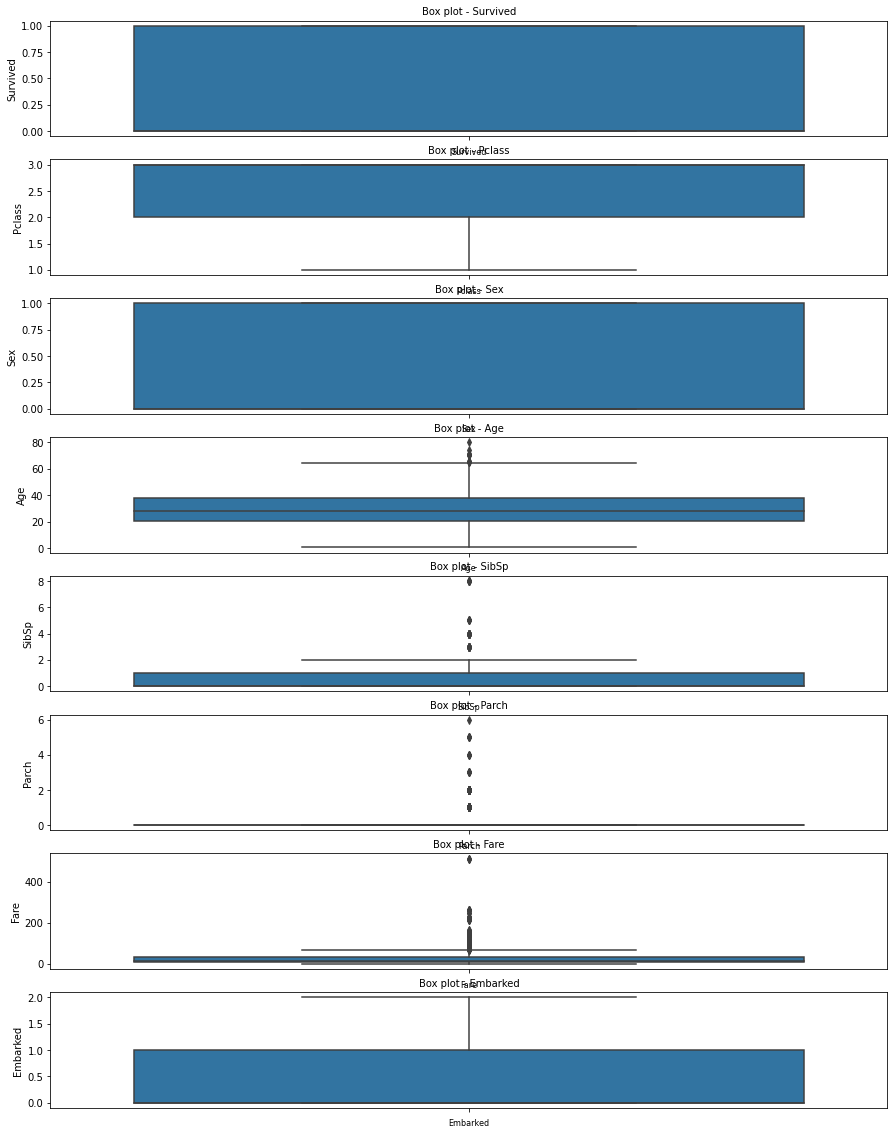

In [ ]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

col_names = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = train_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

> We have outliers in Age, Sibsp, Parch and fare.

In [ ]:
# checking for anormalities
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_BoundSurvived    -1.5000
Pclass       0.5000
Sex         -1.5000
Age         -6.6875
SibSp       -1.5000
Parch        0.0000
Fare       -26.7240
Embarked    -1.5000
dtype: float64
Upper_BoundSurvived     2.5000
Pclass       4.5000
Sex          2.5000
Age         64.8125
SibSp        2.5000
Parch        0.0000
Fare        65.6344
Embarked     2.5000
dtype: float64


In [ ]:
# Filling our null values
train_df.Age = train_df['Age'].fillna(train_df.Age.mode()[0])
train_df.Embarked = train_df['Embarked'].fillna(train_df.Embarked.mode()[0])

> We filled the null values with mode.

In [ ]:
# Identifying the Missing Data
#
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# Dealing with outliers

train_df1 = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df1.shape

(598, 8)

> Removing the outliers will lead to loosing more than a quater of the dataset.

## 6. Exploratory Analysis

#### Univariate Analysis

##### Categorical Variables

In [ ]:
def ba_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    
    # visualize
    plt.figure(figsize = (5,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} /n {}".format(variable,varValue))

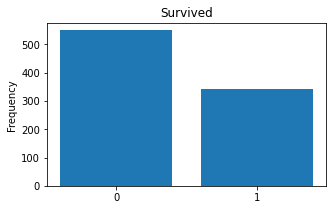

Survived /n 0    549
1    342
Name: Survived, dtype: int64


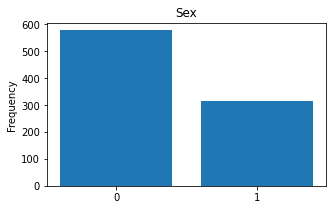

Sex /n 0    577
1    314
Name: Sex, dtype: int64


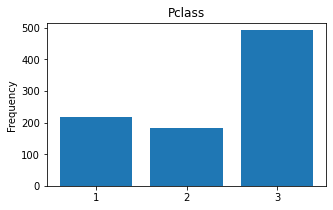

Pclass /n 3    491
1    216
2    184
Name: Pclass, dtype: int64


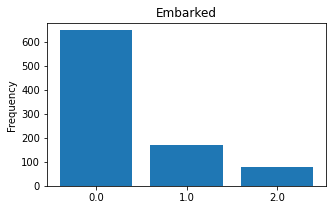

Embarked /n 0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64


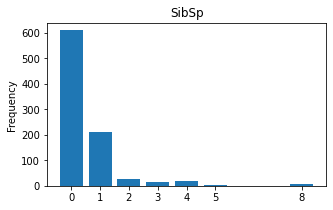

SibSp /n 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


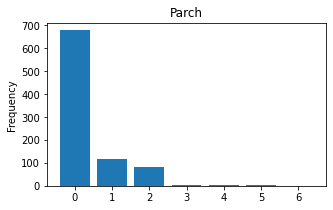

Parch /n 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [ ]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for ka in category1:
    ba_plot(ka)

> From the frequency histogram, we had 549 people who survived while 342 perished, we had 577 male and 314 female, we had 491 passengers in passenger class 3 while 216 in 1st class and 184 in 2nd class. Majority of the passengers originated from place S, followed by C then least from area Q.

##### Numerical Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

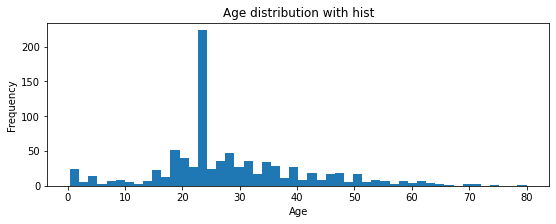

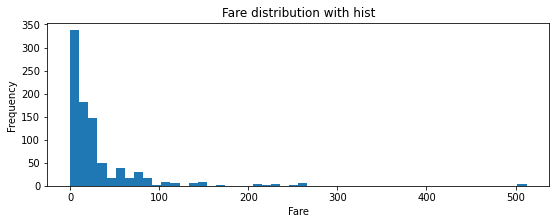

In [ ]:
numericVar = ["Age", "Fare"]
for n in numericVar:
    plot_hist(n)

> From our histograms, age distribution is quiet normaly distributed while fare is right skewed, meaning majority of the passengers paid between zero and 100 dollars while the highest passenger paying upto 500 dollars.

#### Basic Data Analysis

In [ ]:
# Pclass vs Survived
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


> From our analysis majority of the passengers who survived were in the first class and the least survivers were from third class.

In [ ]:
# Sex vs Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


> From our analysis majority of the passengers who survived were female and only a few male managed to survive.

In [ ]:
# SipSb vs Survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


> Of the passengers of thre 6 Sibsps, majorly the Sibsp 1, survived, followed by SibSp 2 and 0, while none of Sibsp 5 and 8 managed to survive. 

In [ ]:
# Embarked vs Survived
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
1,1.0,0.553571
2,2.0,0.389610
0,0.0,0.339009


> The passengers who embarked from place C survived more, compared to Q and least from S.

In [ ]:
# Pclass vs Fare
train_df[["Pclass", "Fare"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Fare", ascending=False)

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


> Passengers in first class had the highest average of fare at 84.155, for second class had an average of 20.7 while for third class had an average of 13.68.

In [ ]:
# Pclass vs Fare
train_df[["Survived", "Age"]].groupby(["Survived"], as_index = False).mean().sort_values(by="Age", ascending=False)

,Survived,Age
0,0,29.117486
1,1,27.683246


> On average most of the people who survived were of age above 29.

#### Bivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed326ff890>,
      dtype=object)

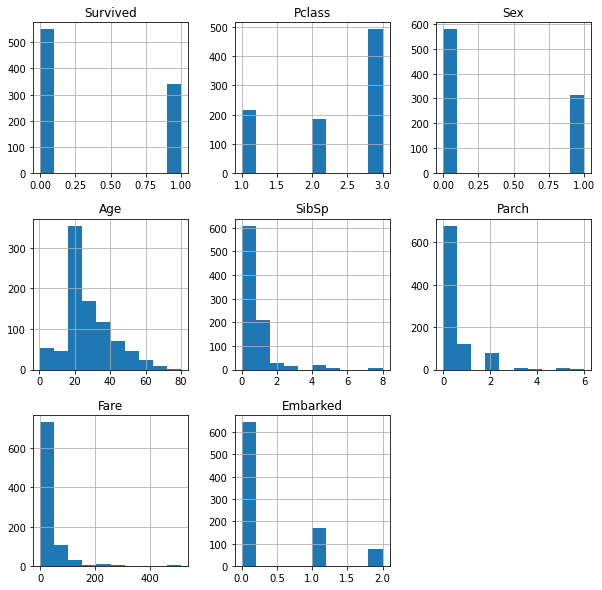

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
# plotting data hystograms

train_df.hist(figsize = (10,10))

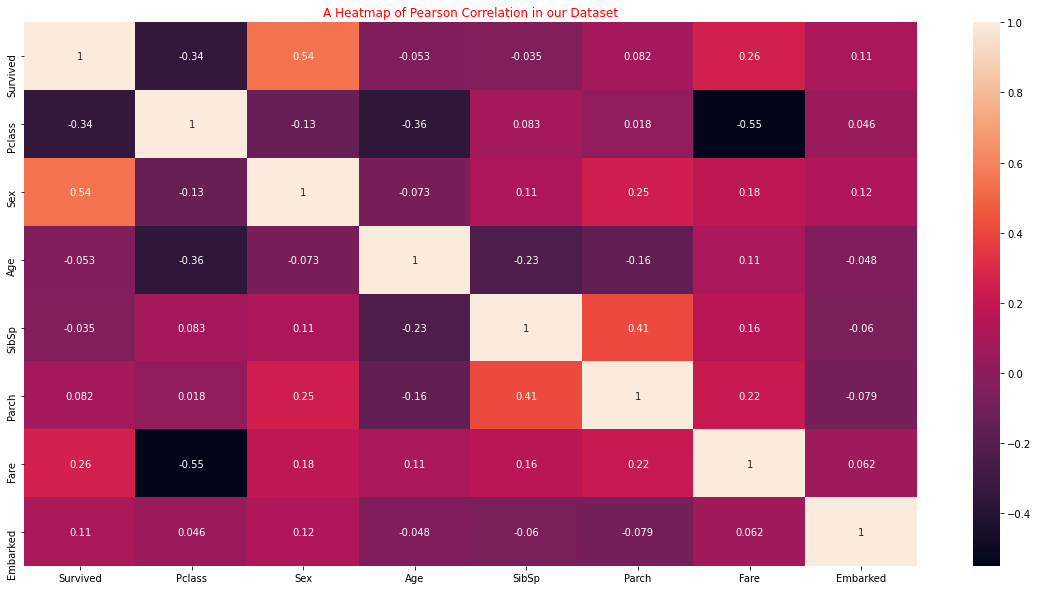

In [ ]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(train_df.corr(), annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

> The features were not highly correlated with a moderate negative correlation between fare and Pclass.

In [ ]:
# finding the correlation

train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.052872,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.356187,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.073377,0.114631,0.245489,0.182333,0.116569
Age,-0.052872,-0.356187,-0.073377,1.000000,-0.232411,-0.155118,0.107554,-0.047625
SibSp,-0.035322,0.083081,0.114631,-0.232411,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.155118,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.107554,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.047625,-0.059961,-0.078665,0.062142,1.000000


> Minimal positive and negative correlation between the features.

In [ ]:
# finding the skewness of our variables
train_df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

> Most of our features are positively skewed, with only Pclass being negatively skewed.

In [ ]:
# finding the kurtosis
train_df.kurt()

Survived    -1.775005
Pclass      -1.280015
Sex         -1.620580
Age          0.922659
SibSp       17.880420
Parch        9.778125
Fare        33.398141
Embarked     1.105629
dtype: float64

#### Multivariate analysis

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Peforming LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[102   8]
 [ 26  43]]
Accuracy0.8100558659217877


> Our accuracy score for the lenear discriminant analysis is 0.81 which is good but not the best.

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# training and prediction
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 18]
 [25 44]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.64      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



> Our true positive is at the precision of 0.79 for 0 and 0.71 for 1, the difference is brought about by class imbalance while our true negative recall is at 0.81 for class 0 and 0.67 for class 1, which is very high due to class imbalance. Our model prediction of classes for f1-score is at 0.81 for class 0 and 0.67 for class 1
> Our overall prediction accuracy was 0.76 which is quit low and we need to improve it.

#### To improve our accuracy we shall try to use different train and test size of the dataset.

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test by 0.7 and 0.3 respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Perfoming the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  28]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       168
           1       0.70      0.66      0.68       100

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



> Using the train size of 0.7 and test size of 0.3 we improve our classification prediction by 0.1 to 0.77 up from from 0.76.

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test by 0.6 and 0.4 respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Perfoming the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[185  36]
 [ 51  85]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       221
           1       0.70      0.62      0.66       136

    accuracy                           0.76       357
   macro avg       0.74      0.73      0.74       357
weighted avg       0.75      0.76      0.75       357



> Increasing our training set to 0.6 and test set to 0.4 we get the original results of accuracy being at 0.76

## 8. Challenging the solution

> We shall challenge our solutions by using different values of n-neighbours and see the change in the accuracy if its better.

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test by 0.7 and 0.2 respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Perfoming the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and prediction
# and increasing our n-value to 10
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  10]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.81      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



> Using n-neighbour at 10 and train set at 0.8 and test set at 0.2, we improve our accuracy to 0.79 which is good compared to the other setting.

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test by 0.7 and 0.3 respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Perfoming the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and prediction
# and increasing our n-value to 10
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# 
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154  14]
 [ 37  63]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       168
           1       0.82      0.63      0.71       100

    accuracy                           0.81       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



> Reducing our train set to 0.7 and increasing test set to 0.3 and setting our n_neighbour to 10 we get a better accuracy of the model at 0.81

In [ ]:
# Data Reduction using Discriminant Analysis
#
X = train_df.iloc[:, 1:8].values
y = train_df.iloc[:, 0].values

# diving our dataset into training and test by 0.6 and 0.4 respectively

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Perfoming the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# training and prediction
# and increasing our n-value to 10
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# making predictions on our test data
# 
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating our algorithm, confusion matrix, precision. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# 
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[205  16]
 [ 54  82]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       221
           1       0.84      0.60      0.70       136

    accuracy                           0.80       357
   macro avg       0.81      0.77      0.78       357
weighted avg       0.81      0.80      0.80       357



> Using a train set of 0.6 and test set of 0.4 and the n_neighbour of 10 we get an accuracy of 0.8 which is smaller than the previous one.

#### Conclusion

> Using an the training set of 0.7 and test set of 0.3 and n_neighbour of 10, gives us the best accuracy compared to the rest of the models.

## 9. Follow up questions

### a). Did we have the right data?

> Yes, the data was correct and right

### b). Do we need other data to answer our question?

> Actually no, we only need to perform more advanced hyperparameter tuning like working on class imbalance.

### c). Did we have the right question?

> Yes, for our classification and accuracy was determined from the data.